In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market/Market.csv


# Exploring Data

## Load libraries

In [2]:
import missingno as msn
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from matplotlib.patches import Polygon
from ydata_profiling import ProfileReport
import datetime as dt

import warnings
# warnings.filterwarnings('ignore')

## Load data

In [3]:
data = pd.read_csv('/kaggle/input/stock-market/Market.csv')
df = pd.DataFrame(data)
df

Index        Date         Open         High          Low        Close  \
0        NYA  12/31/1965   528.690002   528.690002   528.690002   528.690002   
1        NYA    1/3/1966   527.210022   527.210022   527.210022   527.210022   
2        NYA    1/4/1966   527.840027   527.840027   527.840027   527.840027   
3        NYA    1/5/1966   531.119995   531.119995   531.119995   531.119995   
4        NYA    1/6/1966   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100   5/27/2021  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100   5/28/2021  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100   5/31/2021  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100    6/1/2021  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100    6/2/2021  1258.489990  1263.709961  1258.239990  1263.619995   

          Adj Close       Volume  
0        528.690002          0.0  
1        527.210022          0.0  
2        527.840027          0.0  
3        531.119995          0.0  
4        532.070007          0.0  
...             ...          ...  
112452  1247.069946  379696400.0  
112453  1256.599976  160773400.0  
112454  1248.930054   91173700.0  
112455  1258.579956  155179900.0  
112456  1263.619995  148465000.0  

[112457 rows x 8 columns]

In [4]:
ProfileReport(df, minimal = True, progress_bar = False, samples = None,
             correlations = None, interactions = None, explorative = True,
              dark_mode = True, notebook = {
                  'iframe': {
                      'height': '600px'
                  }
              },
              html = {
                  'style': {
                      'primary_color': '#583101'
                  }
              }, missing_diagrams = {
                  'heatmap': False,
                  'dendrogram' : False
              }
             ).to_notebook_iframe()


In [5]:
df.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.shape

(112457, 8)

In [7]:
def check_df(df: object, head: object = 5) -> object:
    print('\n Shape')
    print(df.shape)
    print('\nTypes')
    print(df.dtypes)
    print('\nNot a Number')
    print(df.isnull().sum())
    print('\nInfo ')
    print(df.info())
    
check_df(df)


 Shape
(112457, 8)

Types
Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Not a Number
Index           0
Date            0
Open         2204
High         2205
Low          2206
Close        2207
Adj Close    2213
Volume       2204
dtype: int64

Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110252 non-null  float64
 4   Low        110251 non-null  float64
 5   Close      110250 non-null  float64
 6   Adj Close  110244 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB
None


In [8]:
print('Number of duplicated rows : ', len(df[df.duplicated()]))

Number of duplicated rows :  0


In [9]:
df_1 = df[df['Index'] == 'NYA']
df_1.head()

Index        Date        Open        High         Low       Close  \
0   NYA  12/31/1965  528.690002  528.690002  528.690002  528.690002   
1   NYA    1/3/1966  527.210022  527.210022  527.210022  527.210022   
2   NYA    1/4/1966  527.840027  527.840027  527.840027  527.840027   
3   NYA    1/5/1966  531.119995  531.119995  531.119995  531.119995   
4   NYA    1/6/1966  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0

In [10]:
df_1.describe()[1:].T.style.background_gradient(
    cmap = 'bone',
    axis = 1
)

## Clean data

In [11]:
df_1.apply(lambda x: len(x.unique()))

Index            1
Date         13948
Open         11580
High         11572
Low          11576
Close        11591
Adj Close    11591
Volume        5002
dtype: int64

In [12]:
unique = df_1.nunique().sort_values()
unique_values = df_1.apply(lambda x: x.unique())
pd.DataFrame({
    'Number of Unique Values': unique,
    'Unique Values': unique_values
})

Number of Unique Values  \
Adj Close                    11590   
Close                        11590   
Date                         13948   
High                         11571   
Index                            1   
Low                          11575   
Open                         11579   
Volume                        5001   

                                               Unique Values  
Adj Close  [528.690002, 527.210022, 527.840027, 531.11999...  
Close      [528.690002, 527.210022, 527.840027, 531.11999...  
Date       [12/31/1965, 1/3/1966, 1/4/1966, 1/5/1966, 1/6...  
High       [528.690002, 527.210022, 527.840027, 531.11999...  
Index                                                  [NYA]  
Low        [528.690002, 527.210022, 527.840027, 531.11999...  
Open       [528.690002, 527.210022, 527.840027, 531.11999...  
Volume     [0.0, nan, 1880700000.0, 2169400000.0, 1430800...

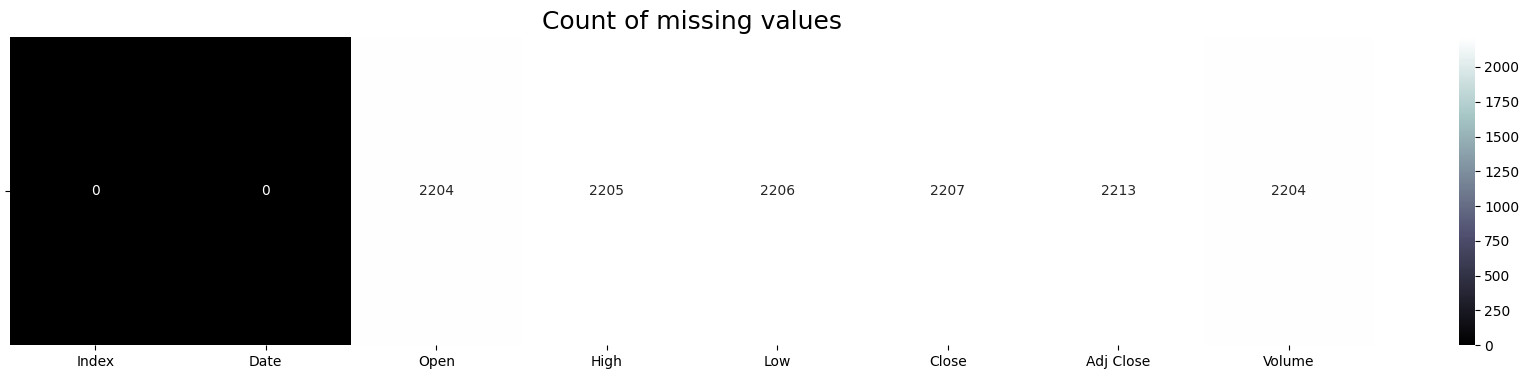

In [13]:
plt.figure(figsize = (22, 4))
sns.heatmap(
    (df.isna().sum().to_frame(name = '')).T,
    cmap = 'bone',
    annot = True,
    fmt = '0.0f'
).set_title('Count of missing values', fontsize = 18)

plt.show()

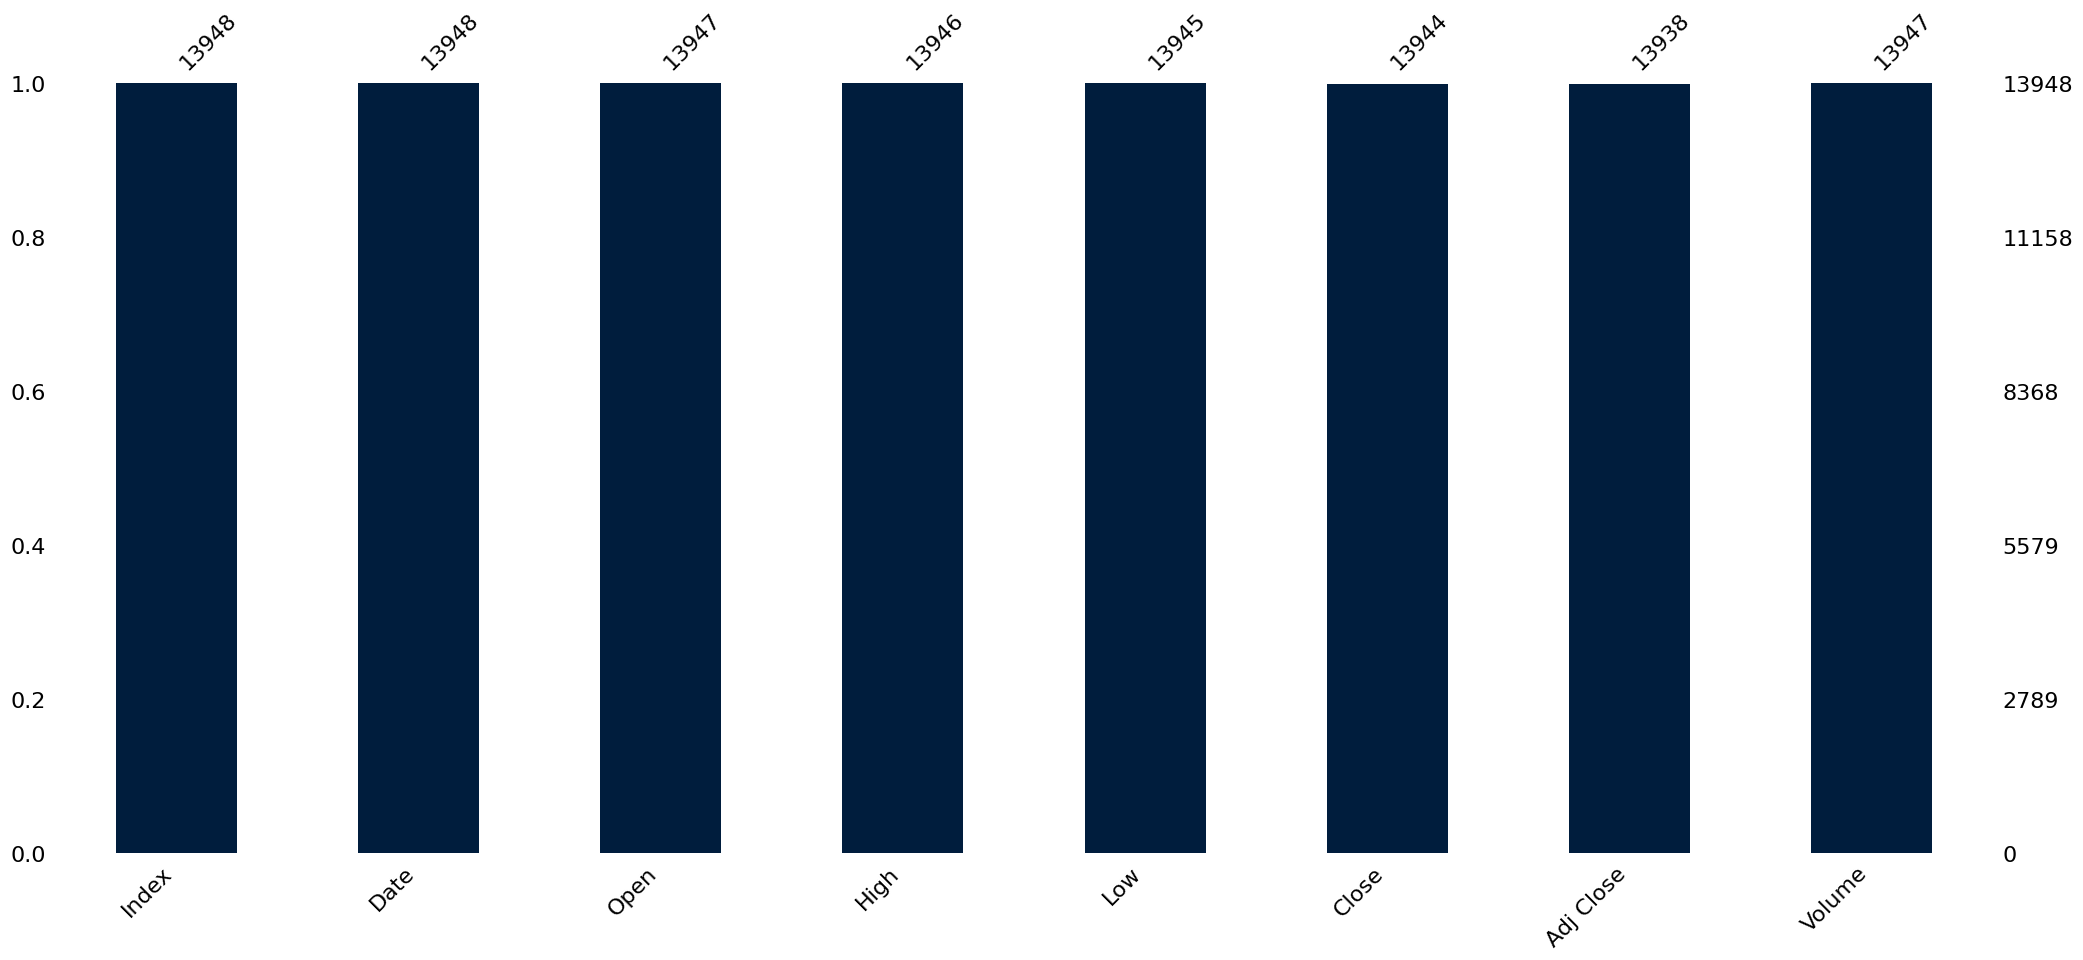

In [14]:
msn.bar(df_1, color = '#001D3D')
plt.show()

In [15]:
df_1.isnull().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
Volume        1
dtype: int64

In [16]:
df_2 = df_1.dropna()
df_2.head()

Index        Date        Open        High         Low       Close  \
0   NYA  12/31/1965  528.690002  528.690002  528.690002  528.690002   
1   NYA    1/3/1966  527.210022  527.210022  527.210022  527.210022   
2   NYA    1/4/1966  527.840027  527.840027  527.840027  527.840027   
3   NYA    1/5/1966  531.119995  531.119995  531.119995  531.119995   
4   NYA    1/6/1966  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0

In [17]:
df_3 = df_2.drop(columns = 'Volume')
df_3

Index        Date          Open          High           Low  \
0       NYA  12/31/1965    528.690002    528.690002    528.690002   
1       NYA    1/3/1966    527.210022    527.210022    527.210022   
2       NYA    1/4/1966    527.840027    527.840027    527.840027   
3       NYA    1/5/1966    531.119995    531.119995    531.119995   
4       NYA    1/6/1966    532.070007    532.070007    532.070007   
...     ...         ...           ...           ...           ...   
13943   NYA   5/24/2021  16375.000000  16508.519530  16375.000000   
13944   NYA   5/25/2021  16464.689450  16525.810550  16375.150390   
13945   NYA   5/26/2021  16390.189450  16466.339840  16388.320310   
13946   NYA   5/27/2021  16451.960940  16546.359380  16451.960940   
13947   NYA   5/28/2021  16531.949220  16588.689450  16531.949220   

              Close     Adj Close  
0        528.690002    528.690002  
1        527.210022    527.210022  
2        527.840027    527.840027  
3        531.119995    531.119995  
4        532.070007    532.070007  
...             ...           ...  
13943  16464.689450  16464.689450  
13944  16390.189450  16390.189450  
13945  16451.960940  16451.960940  
13946  16531.949220  16531.949220  
13947  16555.660160  16555.660160  

[13932 rows x 7 columns]

In [18]:
df_4 = round(df_3)
df_4

Index        Date     Open     High      Low    Close  Adj Close
0       NYA  12/31/1965    529.0    529.0    529.0    529.0      529.0
1       NYA    1/3/1966    527.0    527.0    527.0    527.0      527.0
2       NYA    1/4/1966    528.0    528.0    528.0    528.0      528.0
3       NYA    1/5/1966    531.0    531.0    531.0    531.0      531.0
4       NYA    1/6/1966    532.0    532.0    532.0    532.0      532.0
...     ...         ...      ...      ...      ...      ...        ...
13943   NYA   5/24/2021  16375.0  16509.0  16375.0  16465.0    16465.0
13944   NYA   5/25/2021  16465.0  16526.0  16375.0  16390.0    16390.0
13945   NYA   5/26/2021  16390.0  16466.0  16388.0  16452.0    16452.0
13946   NYA   5/27/2021  16452.0  16546.0  16452.0  16532.0    16532.0
13947   NYA   5/28/2021  16532.0  16589.0  16532.0  16556.0    16556.0

[13932 rows x 7 columns]

In [19]:
df_4.sort_values(by = ['Date'])
df_4

Index        Date     Open     High      Low    Close  Adj Close
0       NYA  12/31/1965    529.0    529.0    529.0    529.0      529.0
1       NYA    1/3/1966    527.0    527.0    527.0    527.0      527.0
2       NYA    1/4/1966    528.0    528.0    528.0    528.0      528.0
3       NYA    1/5/1966    531.0    531.0    531.0    531.0      531.0
4       NYA    1/6/1966    532.0    532.0    532.0    532.0      532.0
...     ...         ...      ...      ...      ...      ...        ...
13943   NYA   5/24/2021  16375.0  16509.0  16375.0  16465.0    16465.0
13944   NYA   5/25/2021  16465.0  16526.0  16375.0  16390.0    16390.0
13945   NYA   5/26/2021  16390.0  16466.0  16388.0  16452.0    16452.0
13946   NYA   5/27/2021  16452.0  16546.0  16452.0  16532.0    16532.0
13947   NYA   5/28/2021  16532.0  16589.0  16532.0  16556.0    16556.0

[13932 rows x 7 columns]

In [20]:
df_4.describe(include = 'all').T.style.background_gradient(cmap = 'bone', axis = 1)

In [21]:
df_4.describe().T.style.background_gradient(cmap = 'bone', axis = 1)

In [22]:
df_4.describe(include=object).T.style.background_gradient(cmap = 'bone', axis = 1)

In [23]:
df_5 = df_4.fillna(method = 'ffill', axis = 1)
df_5

/tmp/ipykernel_17/3921170095.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_5 = df_4.fillna(method = 'ffill', axis = 1)


Index        Date     Open     High      Low    Close Adj Close
0       NYA  12/31/1965    529.0    529.0    529.0    529.0     529.0
1       NYA    1/3/1966    527.0    527.0    527.0    527.0     527.0
2       NYA    1/4/1966    528.0    528.0    528.0    528.0     528.0
3       NYA    1/5/1966    531.0    531.0    531.0    531.0     531.0
4       NYA    1/6/1966    532.0    532.0    532.0    532.0     532.0
...     ...         ...      ...      ...      ...      ...       ...
13943   NYA   5/24/2021  16375.0  16509.0  16375.0  16465.0   16465.0
13944   NYA   5/25/2021  16465.0  16526.0  16375.0  16390.0   16390.0
13945   NYA   5/26/2021  16390.0  16466.0  16388.0  16452.0   16452.0
13946   NYA   5/27/2021  16452.0  16546.0  16452.0  16532.0   16532.0
13947   NYA   5/28/2021  16532.0  16589.0  16532.0  16556.0   16556.0

[13932 rows x 7 columns]

In [24]:
df_5.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [25]:
df_4['Date'] = pd.to_datetime(df_4['Date'])

In [26]:
df_4['Day'] = df_4['Date'].dt.day
df_4['Month'] = df_4['Date'].dt.month
df_4['Year'] = df_4['Date'].dt.year

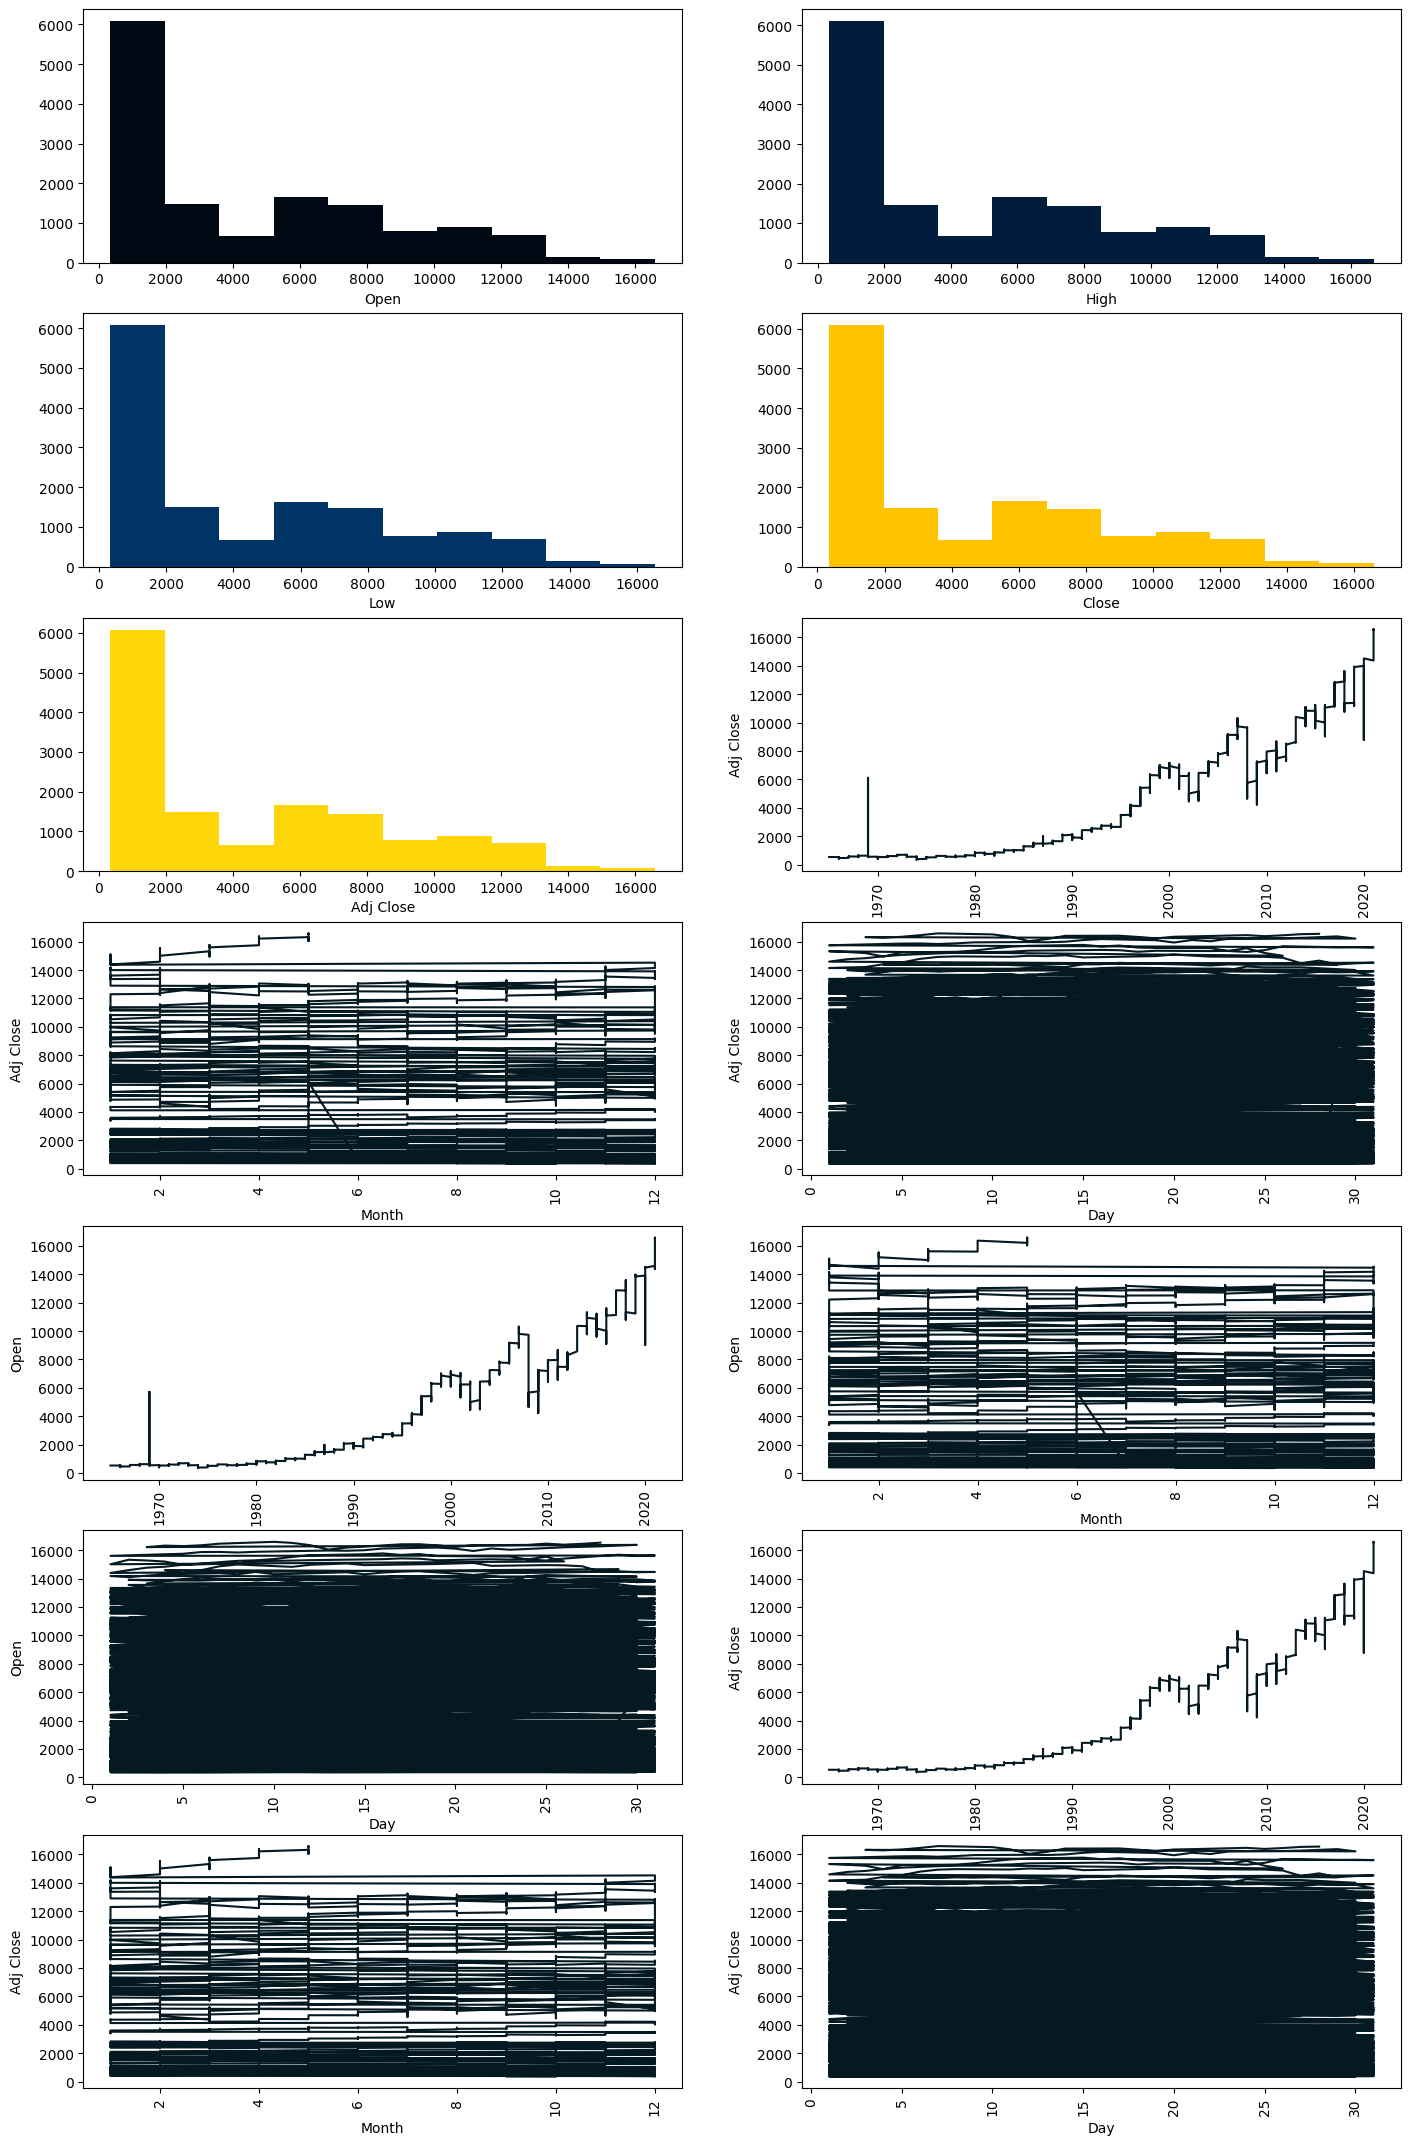

In [27]:
fig, axes = plt.subplots(7, 2, figsize = (17, 27))

axes[0, 0].hist(df_4['Open'], color = '#000814')
axes[0, 0].set_xlabel('Open', fontsize = 10)

axes[0, 1].hist(df_4['High'], color = '#001D3D')
axes[0, 1].set_xlabel('High', fontsize = 10)

axes[1, 0].hist(df_4['Low'], color = '#003466')
axes[1, 0].set_xlabel('Low', fontsize = 10)

axes[1, 1].hist(df_4['Close'], color = '#FFC300')
axes[1, 1].set_xlabel('Close', fontsize = 10)

axes[2, 0].hist(df_4['Adj Close'], color = '#FFD60A')
axes[2, 0].set_xlabel('Adj Close', fontsize = 10)
axes[2, 1].plot(df_4['Year'], df_4['Adj Close'], color = '#051923')
axes[2, 1].set_xlabel('Year', fontsize = 10)
axes[2, 1].set_ylabel('Adj Close', fontsize = 10)
axes[2, 1].tick_params(axis = 'x', rotation = 90)
axes[3, 0].plot(df_4['Month'], df_4['Adj Close'], color = '#051923')
axes[3, 0].set_xlabel('Month', fontsize = 10)
axes[3, 0].set_ylabel('Adj Close', fontsize = 10)
axes[3, 0].tick_params(axis = 'x', rotation = 90)
axes[3, 1].plot(df_4['Day'], df_4['Adj Close'], color ='#051923')
axes[3, 1].set_xlabel('Day', fontsize = 10)
axes[3, 1].set_ylabel('Adj Close', fontsize = 10)
axes[3, 1].tick_params(axis = 'x', rotation = 90)

axes[4, 0].plot(df_4['Year'], df_4['Open'], color = '#051923')
axes[4, 0].set_xlabel('Year', fontsize = 10)
axes[4, 0].set_ylabel('Open', fontsize = 10)
axes[4, 0].tick_params(axis = 'x', rotation = 90)
axes[4, 1].plot(df_4['Month'], df_4['Open'], color = '#051923')
axes[4, 1].set_xlabel('Month', fontsize = 10)
axes[4, 1].set_ylabel('Open', fontsize = 10)
axes[4, 1].tick_params(axis = 'x', rotation = 90)
axes[5, 0].plot(df_4['Day'], df_4['Open'], color ='#051923')
axes[5, 0].set_xlabel('Day', fontsize = 10)
axes[5, 0].set_ylabel('Open', fontsize = 10)
axes[5, 0].tick_params(axis = 'x', rotation = 90)

axes[5, 1].plot(df_4['Year'], df_4['Close'], color='#051923')
axes[5, 1].set_xlabel('Year', fontsize=10)
axes[5, 1].set_ylabel('Adj Close', fontsize=10)
axes[5, 1].tick_params(axis='x', rotation=90)
axes[6, 0].plot(df_4['Month'], df_4['Close'], color='#051923')
axes[6, 0].set_xlabel('Month', fontsize=10)
axes[6, 0].set_ylabel('Adj Close', fontsize=10)
axes[6, 0].tick_params(axis='x', rotation=90)
axes[6, 1].plot(df_4['Day'], df_4['Close'], color='#051923')
axes[6, 1].set_xlabel('Day', fontsize=10)
axes[6, 1].set_ylabel('Adj Close', fontsize=10)
axes[6, 1].tick_params(axis='x', rotation=90)
plt.show()

## Handle Outliers

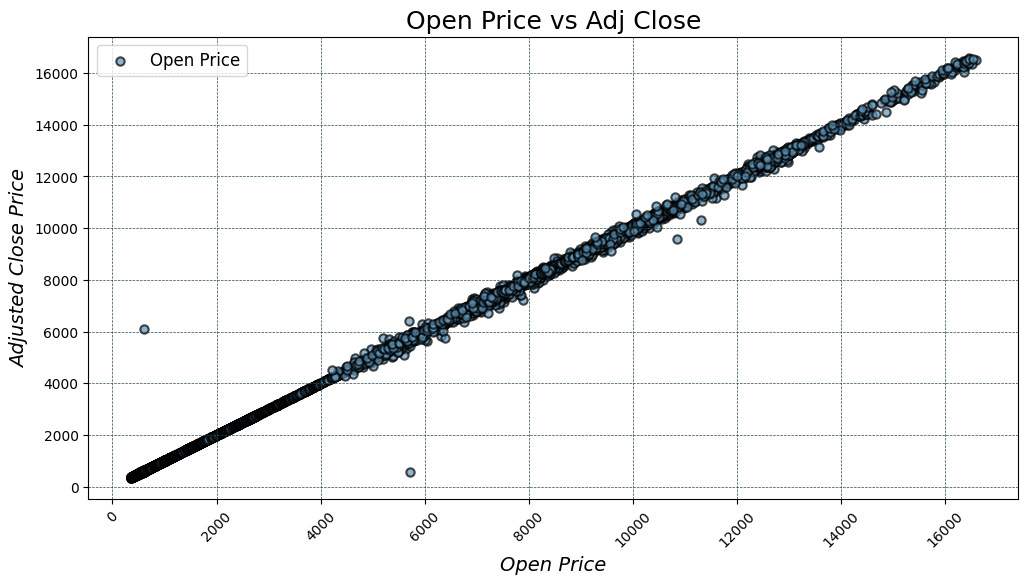

In [28]:
plt.figure(figsize = (12, 6))
plt.scatter(df_4['Open'], df_4['Adj Close'], c = '#6096ba',
            alpha = 0.7, marker = 'o', edgecolors = 'black',
            linewidth = 1.5
           )
plt.legend(['Open Price'], loc = 'upper left', fontsize = 12)
plt.title('Open Price vs Adj Close', fontsize = 18)
plt.xlabel('Open Price', fontsize = 14, fontstyle = 'italic')
plt.ylabel('Adjusted Close Price', fontsize = 14, fontstyle ='italic')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', linewidth=0.5, color = '#264653')
plt.show()

In [29]:
noise_1 = df_4[(df_4['Adj Close'] > 5000) & (df_4['Open'] < 2000)]
noise_1

Index       Date   Open   High    Low  Close  Adj Close  Day  Month  Year
831   NYA 1969-05-29  612.0  612.0  612.0  612.0     6111.0   29      5  1969

In [30]:
noise_1_2 = df_2[(df_4['Adj Close'] > 5000)]
noise_1_2.head()

Index       Date         Open         High          Low        Close  \
831    NYA  5/29/1969   611.900024   611.900024   611.900024   611.900024   
7932   NYA   7/3/1997  5050.859863  5050.859863  5050.859863  5050.859863   
7933   NYA   7/7/1997  5028.339844  5028.339844  5028.339844  5028.339844   
7934   NYA   7/8/1997  5059.419922  5059.419922  5059.419922  5059.419922   
7935   NYA   7/9/1997  5001.689941  5001.689941  5001.689941  5001.689941   

        Adj Close  Volume  
831   6110.900024     0.0  
7932  5050.859863     0.0  
7933  5028.339844     0.0  
7934  5059.419922     0.0  
7935  5001.689941     0.0

In [31]:
noise_2 = df_4[(df_4['Adj Close'] < 1500) & (df_4['Open'] > 5000)]
noise_2

Index       Date    Open   High    Low  Close  Adj Close  Day  Month  Year
852   NYA 1969-06-30  5722.0  572.0  572.0  572.0      572.0   30      6  1969

In [32]:
noise_2_1 = df_4[(df_4['Open'] > 5000)]
noise_2_1

Index       Date     Open     High      Low    Close  Adj Close  Day  \
852     NYA 1969-06-30   5722.0    572.0    572.0    572.0      572.0   30   
7932    NYA 1997-07-03   5051.0   5051.0   5051.0   5051.0     5051.0    3   
7933    NYA 1997-07-07   5028.0   5028.0   5028.0   5028.0     5028.0    7   
7934    NYA 1997-07-08   5059.0   5059.0   5059.0   5059.0     5059.0    8   
7935    NYA 1997-07-09   5002.0   5002.0   5002.0   5002.0     5002.0    9   
...     ...        ...      ...      ...      ...      ...        ...  ...   
13943   NYA 2021-05-24  16375.0  16509.0  16375.0  16465.0    16465.0   24   
13944   NYA 2021-05-25  16465.0  16526.0  16375.0  16390.0    16390.0   25   
13945   NYA 2021-05-26  16390.0  16466.0  16388.0  16452.0    16452.0   26   
13946   NYA 2021-05-27  16452.0  16546.0  16452.0  16532.0    16532.0   27   
13947   NYA 2021-05-28  16532.0  16589.0  16532.0  16556.0    16556.0   28   

       Month  Year  
852        6  1969  
7932       7  1997  
7933       7  1997  
7934       7  1997  
7935       7  1997  
...      ...   ...  
13943      5  2021  
13944      5  2021  
13945      5  2021  
13946      5  2021  
13947      5  2021  

[5884 rows x 10 columns]

In [33]:
df_5 = df_4.drop(index = [831, 852])
df_5

Index       Date     Open     High      Low    Close  Adj Close  Day  \
0       NYA 1965-12-31    529.0    529.0    529.0    529.0      529.0   31   
1       NYA 1966-01-03    527.0    527.0    527.0    527.0      527.0    3   
2       NYA 1966-01-04    528.0    528.0    528.0    528.0      528.0    4   
3       NYA 1966-01-05    531.0    531.0    531.0    531.0      531.0    5   
4       NYA 1966-01-06    532.0    532.0    532.0    532.0      532.0    6   
...     ...        ...      ...      ...      ...      ...        ...  ...   
13943   NYA 2021-05-24  16375.0  16509.0  16375.0  16465.0    16465.0   24   
13944   NYA 2021-05-25  16465.0  16526.0  16375.0  16390.0    16390.0   25   
13945   NYA 2021-05-26  16390.0  16466.0  16388.0  16452.0    16452.0   26   
13946   NYA 2021-05-27  16452.0  16546.0  16452.0  16532.0    16532.0   27   
13947   NYA 2021-05-28  16532.0  16589.0  16532.0  16556.0    16556.0   28   

       Month  Year  
0         12  1965  
1          1  1966  
2          1  1966  
3          1  1966  
4          1  1966  
...      ...   ...  
13943      5  2021  
13944      5  2021  
13945      5  2021  
13946      5  2021  
13947      5  2021  

[13930 rows x 10 columns]

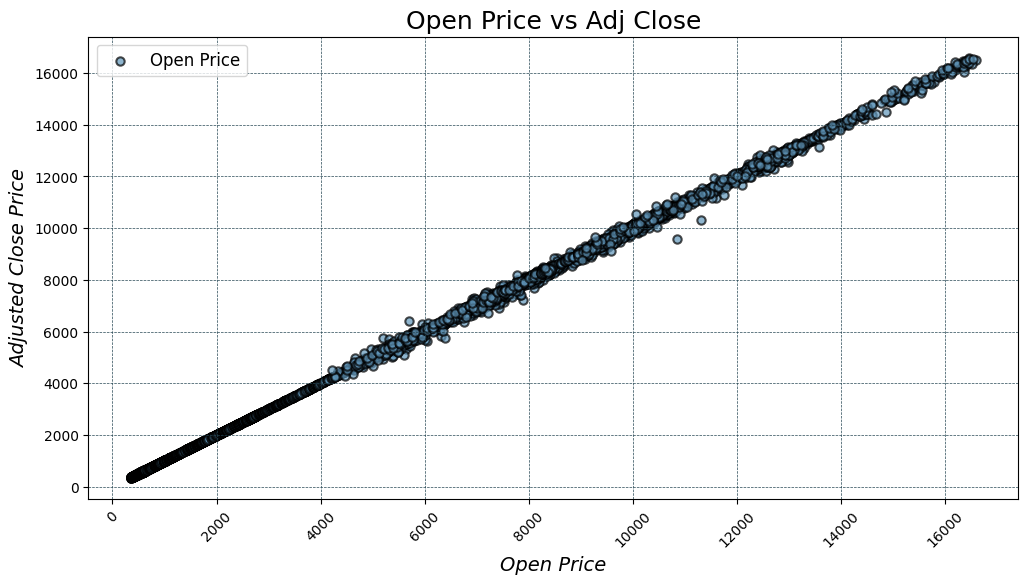

In [34]:
plt.figure(figsize = (12, 6))
plt.scatter(df_5['Open'], df_5['Adj Close'], c = '#6096ba',
            alpha = 0.7, marker = 'o', edgecolors = 'black',
            linewidth = 1.5
           )
plt.legend(['Open Price'], loc = 'upper left', fontsize = 12)
plt.title('Open Price vs Adj Close', fontsize = 18)
plt.xlabel('Open Price', fontsize = 14, fontstyle = 'italic')
plt.ylabel('Adjusted Close Price', fontsize = 14, fontstyle ='italic')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', linewidth=0.5, color = '#264653')
plt.show()

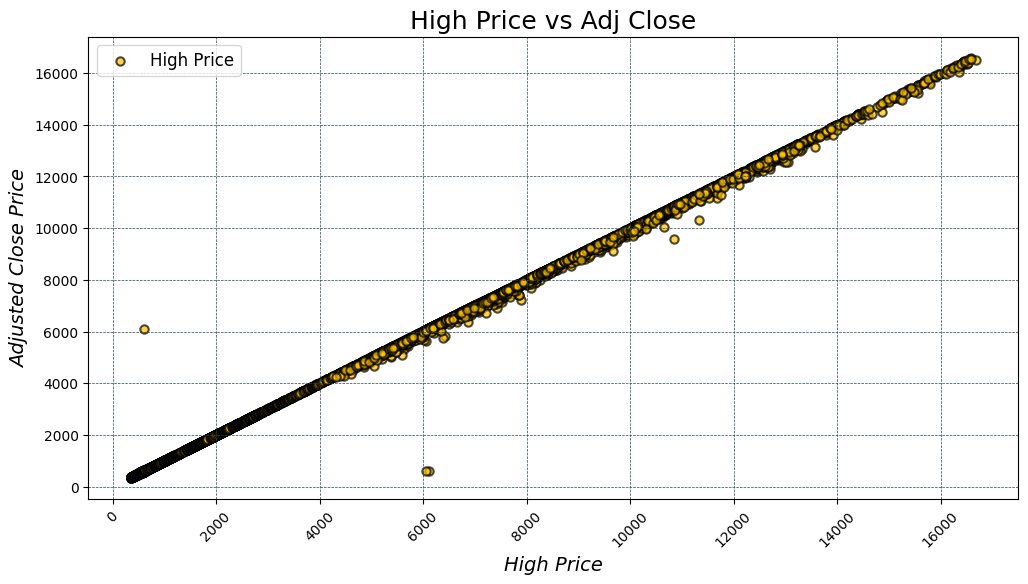

In [35]:
plt.figure(figsize = (12, 6))
plt.scatter(df_4['High'], df_4['Adj Close'], c = '#FFC300',
            alpha = 0.7, marker = 'o', edgecolors = 'black',
            linewidth = 1.5
           )
plt.legend(['High Price'], loc = 'upper left', fontsize = 12)
plt.title('High Price vs Adj Close', fontsize = 18)
plt.xlabel('High Price', fontsize = 14, fontstyle = 'italic')
plt.ylabel('Adjusted Close Price', fontsize = 14, fontstyle ='italic')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', linewidth=0.5, color = '#264653')
plt.show()

In [36]:
noise_12 = df_5[(df_5['Adj Close'] < 2000) & (df_5['High'] > 5000)]
noise_12

Index       Date   Open    High    Low  Close  Adj Close  Day  Month  Year
829   NYA 1969-05-27  612.0  6124.0  612.0  612.0      612.0   27      5  1969
833   NYA 1969-06-03  607.0  6066.0  607.0  607.0      607.0    3      6  1969

In [37]:
df_6 = df_5.drop(index = [829, 833])
df_6

Index       Date     Open     High      Low    Close  Adj Close  Day  \
0       NYA 1965-12-31    529.0    529.0    529.0    529.0      529.0   31   
1       NYA 1966-01-03    527.0    527.0    527.0    527.0      527.0    3   
2       NYA 1966-01-04    528.0    528.0    528.0    528.0      528.0    4   
3       NYA 1966-01-05    531.0    531.0    531.0    531.0      531.0    5   
4       NYA 1966-01-06    532.0    532.0    532.0    532.0      532.0    6   
...     ...        ...      ...      ...      ...      ...        ...  ...   
13943   NYA 2021-05-24  16375.0  16509.0  16375.0  16465.0    16465.0   24   
13944   NYA 2021-05-25  16465.0  16526.0  16375.0  16390.0    16390.0   25   
13945   NYA 2021-05-26  16390.0  16466.0  16388.0  16452.0    16452.0   26   
13946   NYA 2021-05-27  16452.0  16546.0  16452.0  16532.0    16532.0   27   
13947   NYA 2021-05-28  16532.0  16589.0  16532.0  16556.0    16556.0   28   

       Month  Year  
0         12  1965  
1          1  1966  
2          1  1966  
3          1  1966  
4          1  1966  
...      ...   ...  
13943      5  2021  
13944      5  2021  
13945      5  2021  
13946      5  2021  
13947      5  2021  

[13928 rows x 10 columns]

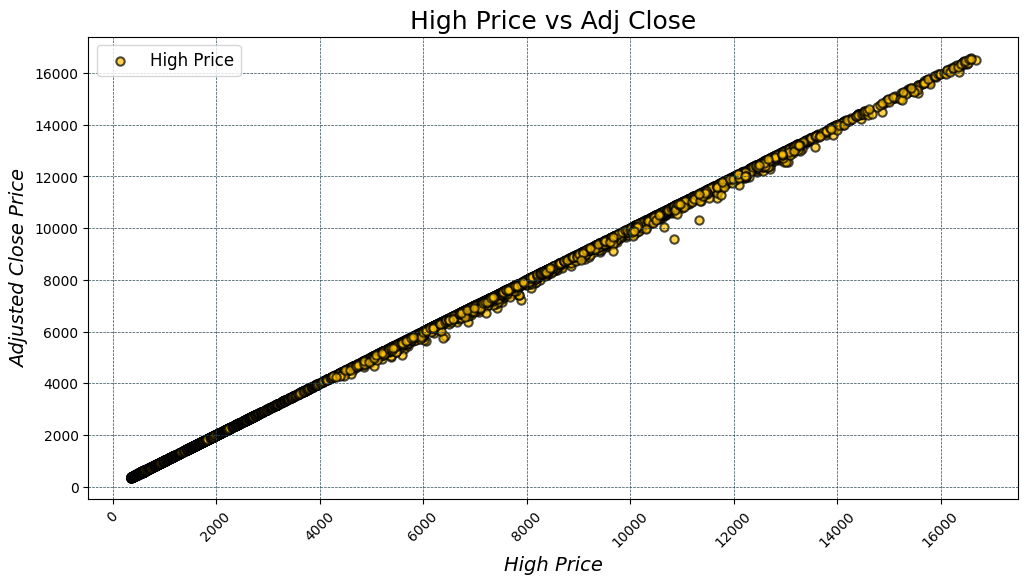

In [38]:
plt.figure(figsize = (12, 6))
plt.scatter(df_6['High'], df_6['Adj Close'], c = '#FFC300',
            alpha = 0.7, marker = 'o', edgecolors = 'black',
            linewidth = 1.5
           )
plt.legend(['High Price'], loc = 'upper left', fontsize = 12)
plt.title('High Price vs Adj Close', fontsize = 18)
plt.xlabel('High Price', fontsize = 14, fontstyle = 'italic')
plt.ylabel('Adjusted Close Price', fontsize = 14, fontstyle ='italic')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', linewidth=0.5, color = '#264653')
plt.show()

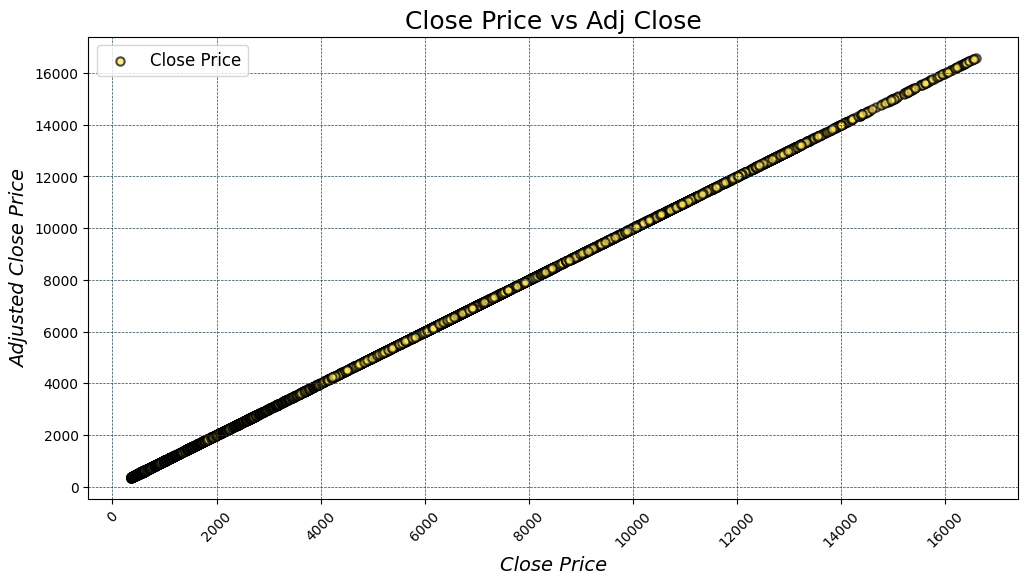

In [39]:
plt.figure(figsize = (12, 6))
plt.scatter(df_6['Close'], df_6['Adj Close'], c = '#ffe45e',
            alpha = 0.7, marker = 'o', edgecolors = 'black',
            linewidth = 1.5
           )
plt.legend(['Close Price'], loc = 'upper left', fontsize = 12)
plt.title('Close Price vs Adj Close', fontsize = 18)
plt.xlabel('Close Price', fontsize = 14, fontstyle = 'italic')
plt.ylabel('Adjusted Close Price', fontsize = 14, fontstyle ='italic')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', linewidth=0.5, color = '#264653')
plt.show()

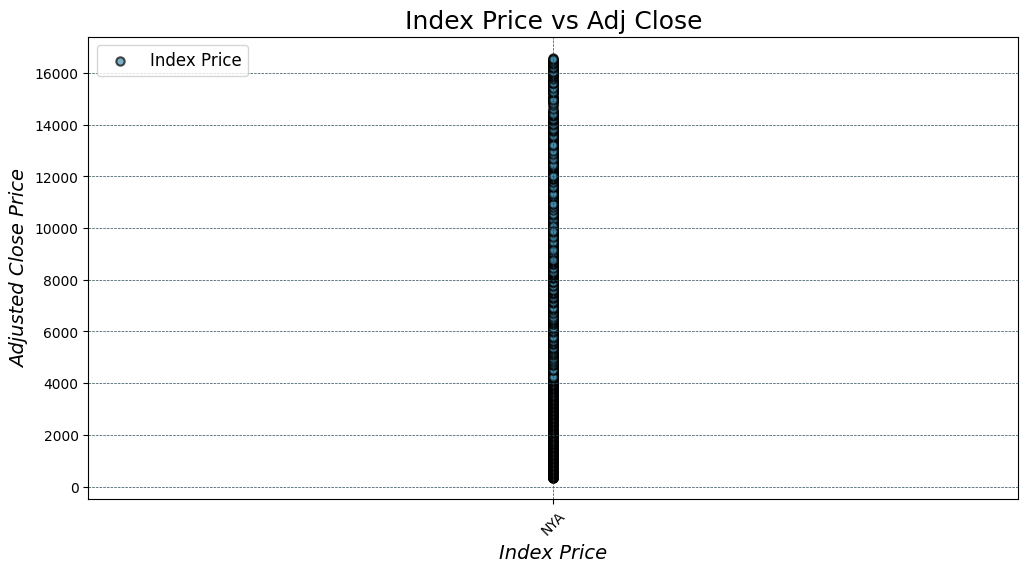

In [40]:
plt.figure(figsize = (12, 6))
plt.scatter(df_6['Index'], df_6['Adj Close'], c = '#468faf',
            alpha = 0.7, marker = 'o', edgecolors = 'black',
            linewidth = 1.5
           )
plt.legend(['Index Price'], loc = 'upper left', fontsize = 12)
plt.title('Index Price vs Adj Close', fontsize = 18)
plt.xlabel('Index Price', fontsize = 14, fontstyle = 'italic')
plt.ylabel('Adjusted Close Price', fontsize = 14, fontstyle ='italic')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', linewidth=0.5, color = '#264653')
plt.show()

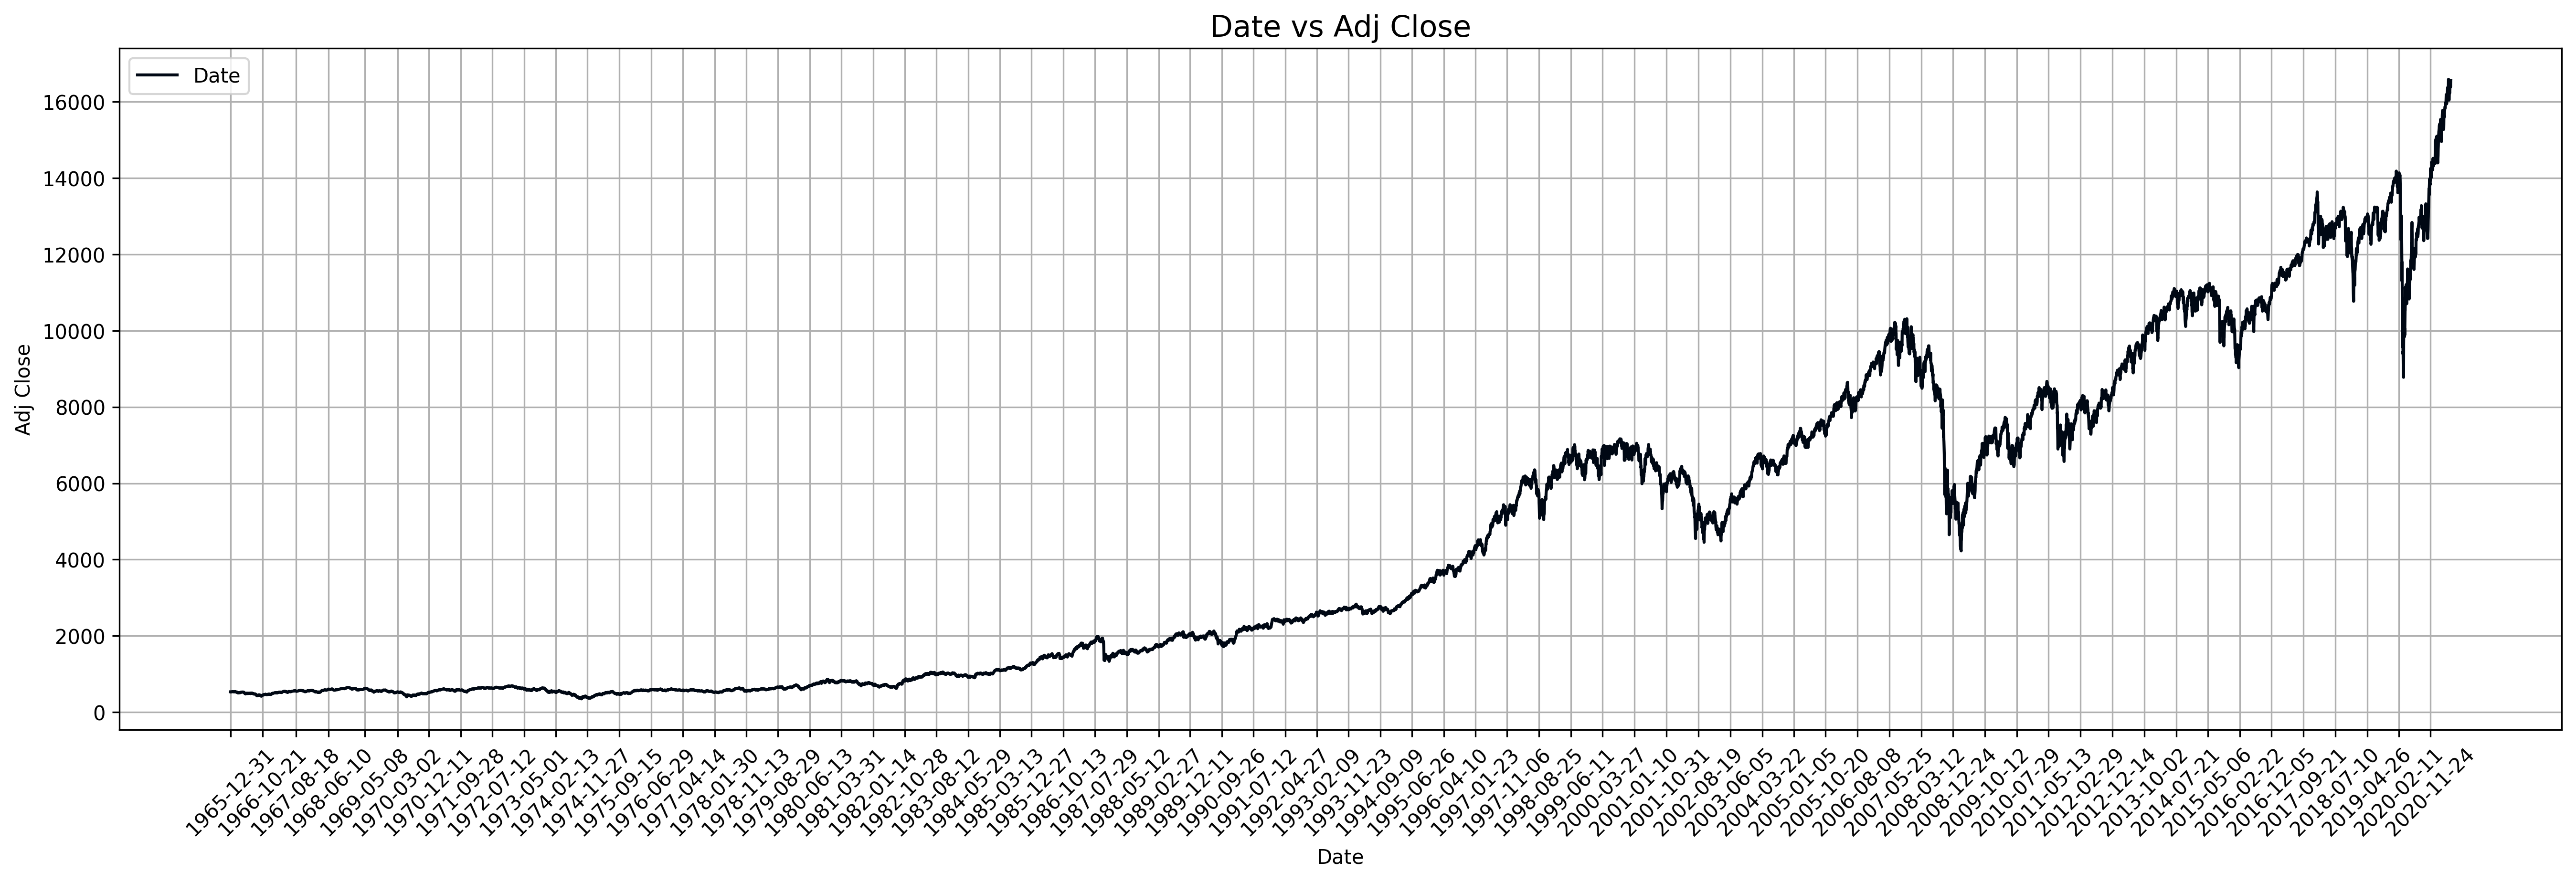

In [41]:
plt.figure(figsize=(22, 7), dpi = 300)
plt.plot(df_6['Date'], df_6['Adj Close'] , c = '#000814')
plt.legend(['Date'], loc = 'best')
plt.title('Date vs Adj Close', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Adj Close', fontsize = 10)
plt.xticks(df_6['Date'][::200], rotation = 45)
plt.gcf().subplots_adjust(bottom = 0.20)
plt.grid()
plt.show()

In [42]:
figure = px.pie(df_4, values = 'Adj Close', names = 'Year',
                hole = 0.25, color = 'Year', 
                color_discrete_sequence = [
                    '#000814', '#001D3D', '#003566', '#FFC300', '#FFD60A'
                ]
               )
figure.update_layout(title = 'Pie Chart of Adj Close values by Year')
figure.update_traces(
    marker = dict(
        line = dict( color = 'white', width = 2 )
        
    ), text = df_4['Year'].astype(str)
)
figure.update_layout(legend_title_text = 'Years', width = 1000, height = 800)

In [43]:
figure = px.pie(df_4, values = 'Adj Close', names = 'Month',
                hole = 0.25, color = 'Month', 
                color_discrete_sequence = [
                    '#000814', '#001D3D', '#003566', '#FFC300', '#FFD60A'
                ]
               )
figure.update_layout(title = 'Pie Chart of Adj Close values by Month')
figure.update_traces(
    marker = dict(
        line = dict( color = 'white', width = 2 )
        
    ), text = df_4['Month'].astype(str)
)
figure.update_layout(legend_title_text = 'Months', width = 1000, height = 800)

In [44]:
figure = px.pie(df_4, values = 'Adj Close', names = 'Day',
                hole = 0.25, color = 'Day', 
                color_discrete_sequence = [
                    '#000814', '#001D3D', '#003566', '#FFC300', '#FFD60A'
                ]
               )
figure.update_layout(title = 'Pie Chart of Adj Close values by Day')
figure.update_traces(
    marker = dict(
        line = dict( color = 'white', width = 2 )
        
    ), text = df_4['Day'].astype(str)
)
figure.update_layout(legend_title_text = 'Days', width = 1000, height = 800)

In [45]:
figure = go.Figure(
    data = [
        go.Candlestick(
        x = df_6.index,
        open = df_6['Open'],
        high = df_6['High'],
        low = df_6['Low'],
        close = df_6['Adj Close']
        )
    ]
)
figure.update_layout(title = 'Time Series Analysis (CandleStick Chart)', xaxis_rangeslider_visible = False)
figure.show()

In [46]:
df_6['Date'] = pd.to_datetime(df_6['Date'])
df_6['Date']

0       1965-12-31
1       1966-01-03
2       1966-01-04
3       1966-01-05
4       1966-01-06
           ...    
13943   2021-05-24
13944   2021-05-25
13945   2021-05-26
13946   2021-05-27
13947   2021-05-28
Name: Date, Length: 13928, dtype: datetime64[ns]

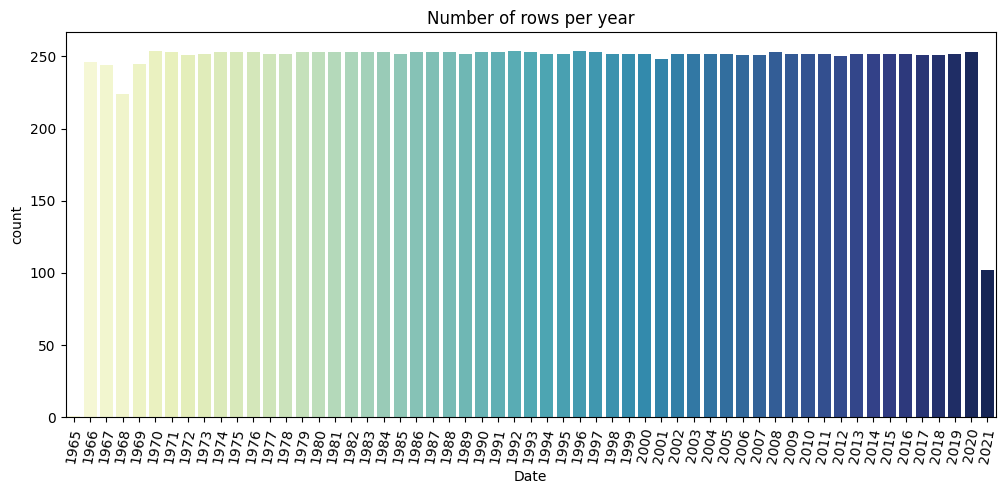

In [47]:
Year = pd.to_datetime(df_6['Date']).dt.year
plt.figure(figsize=(12, 5))
plt.title('Number of rows per year')
plt.xticks(rotation = 80)
sns.countplot(x = Year, palette = 'YlGnBu')
plt.show()

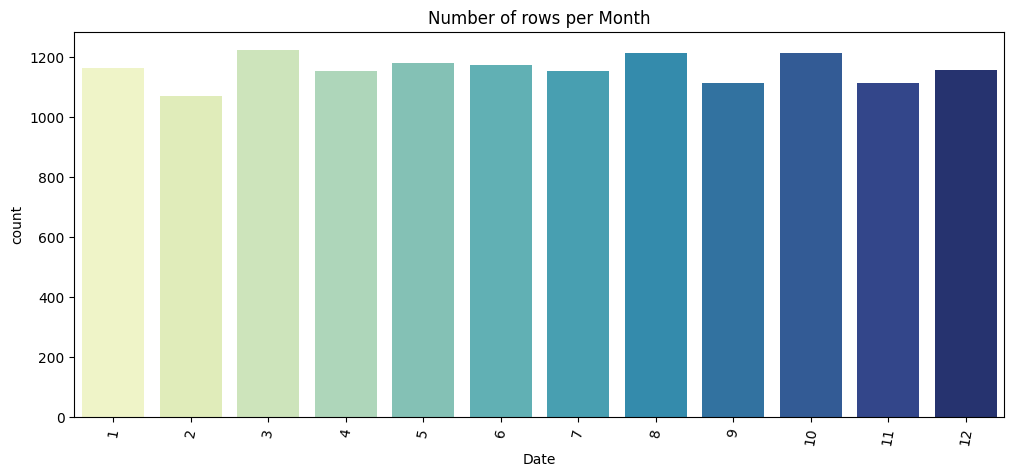

In [48]:
Month = pd.to_datetime(df_6['Date']).dt.month
plt.figure(figsize=(12, 5))
plt.title('Number of rows per Month')
plt.xticks(rotation = 80)
sns.countplot(x = Month, palette = 'YlGnBu')
plt.show()

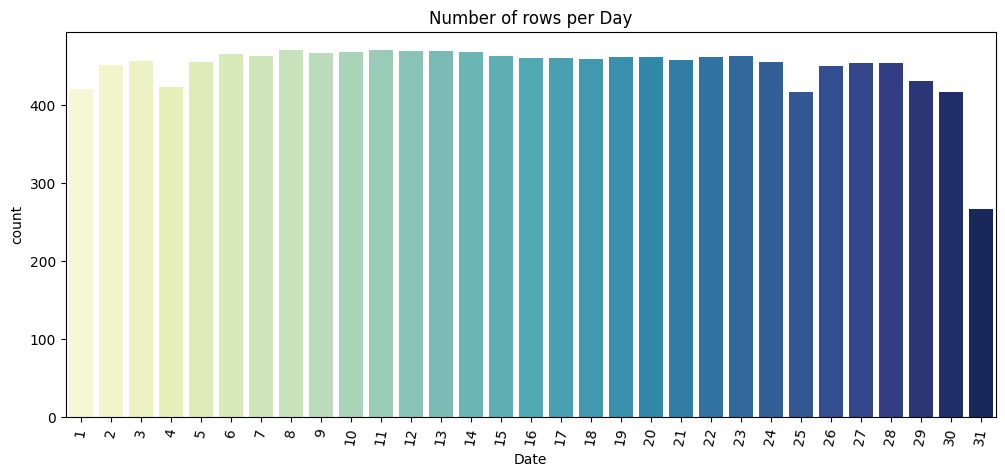

In [49]:
Day = pd.to_datetime(df_6['Date']).dt.day
plt.figure(figsize=(12, 5))
plt.title('Number of rows per Day')
plt.xticks(rotation = 80)
sns.countplot(x = Day, palette = 'YlGnBu')
plt.show()

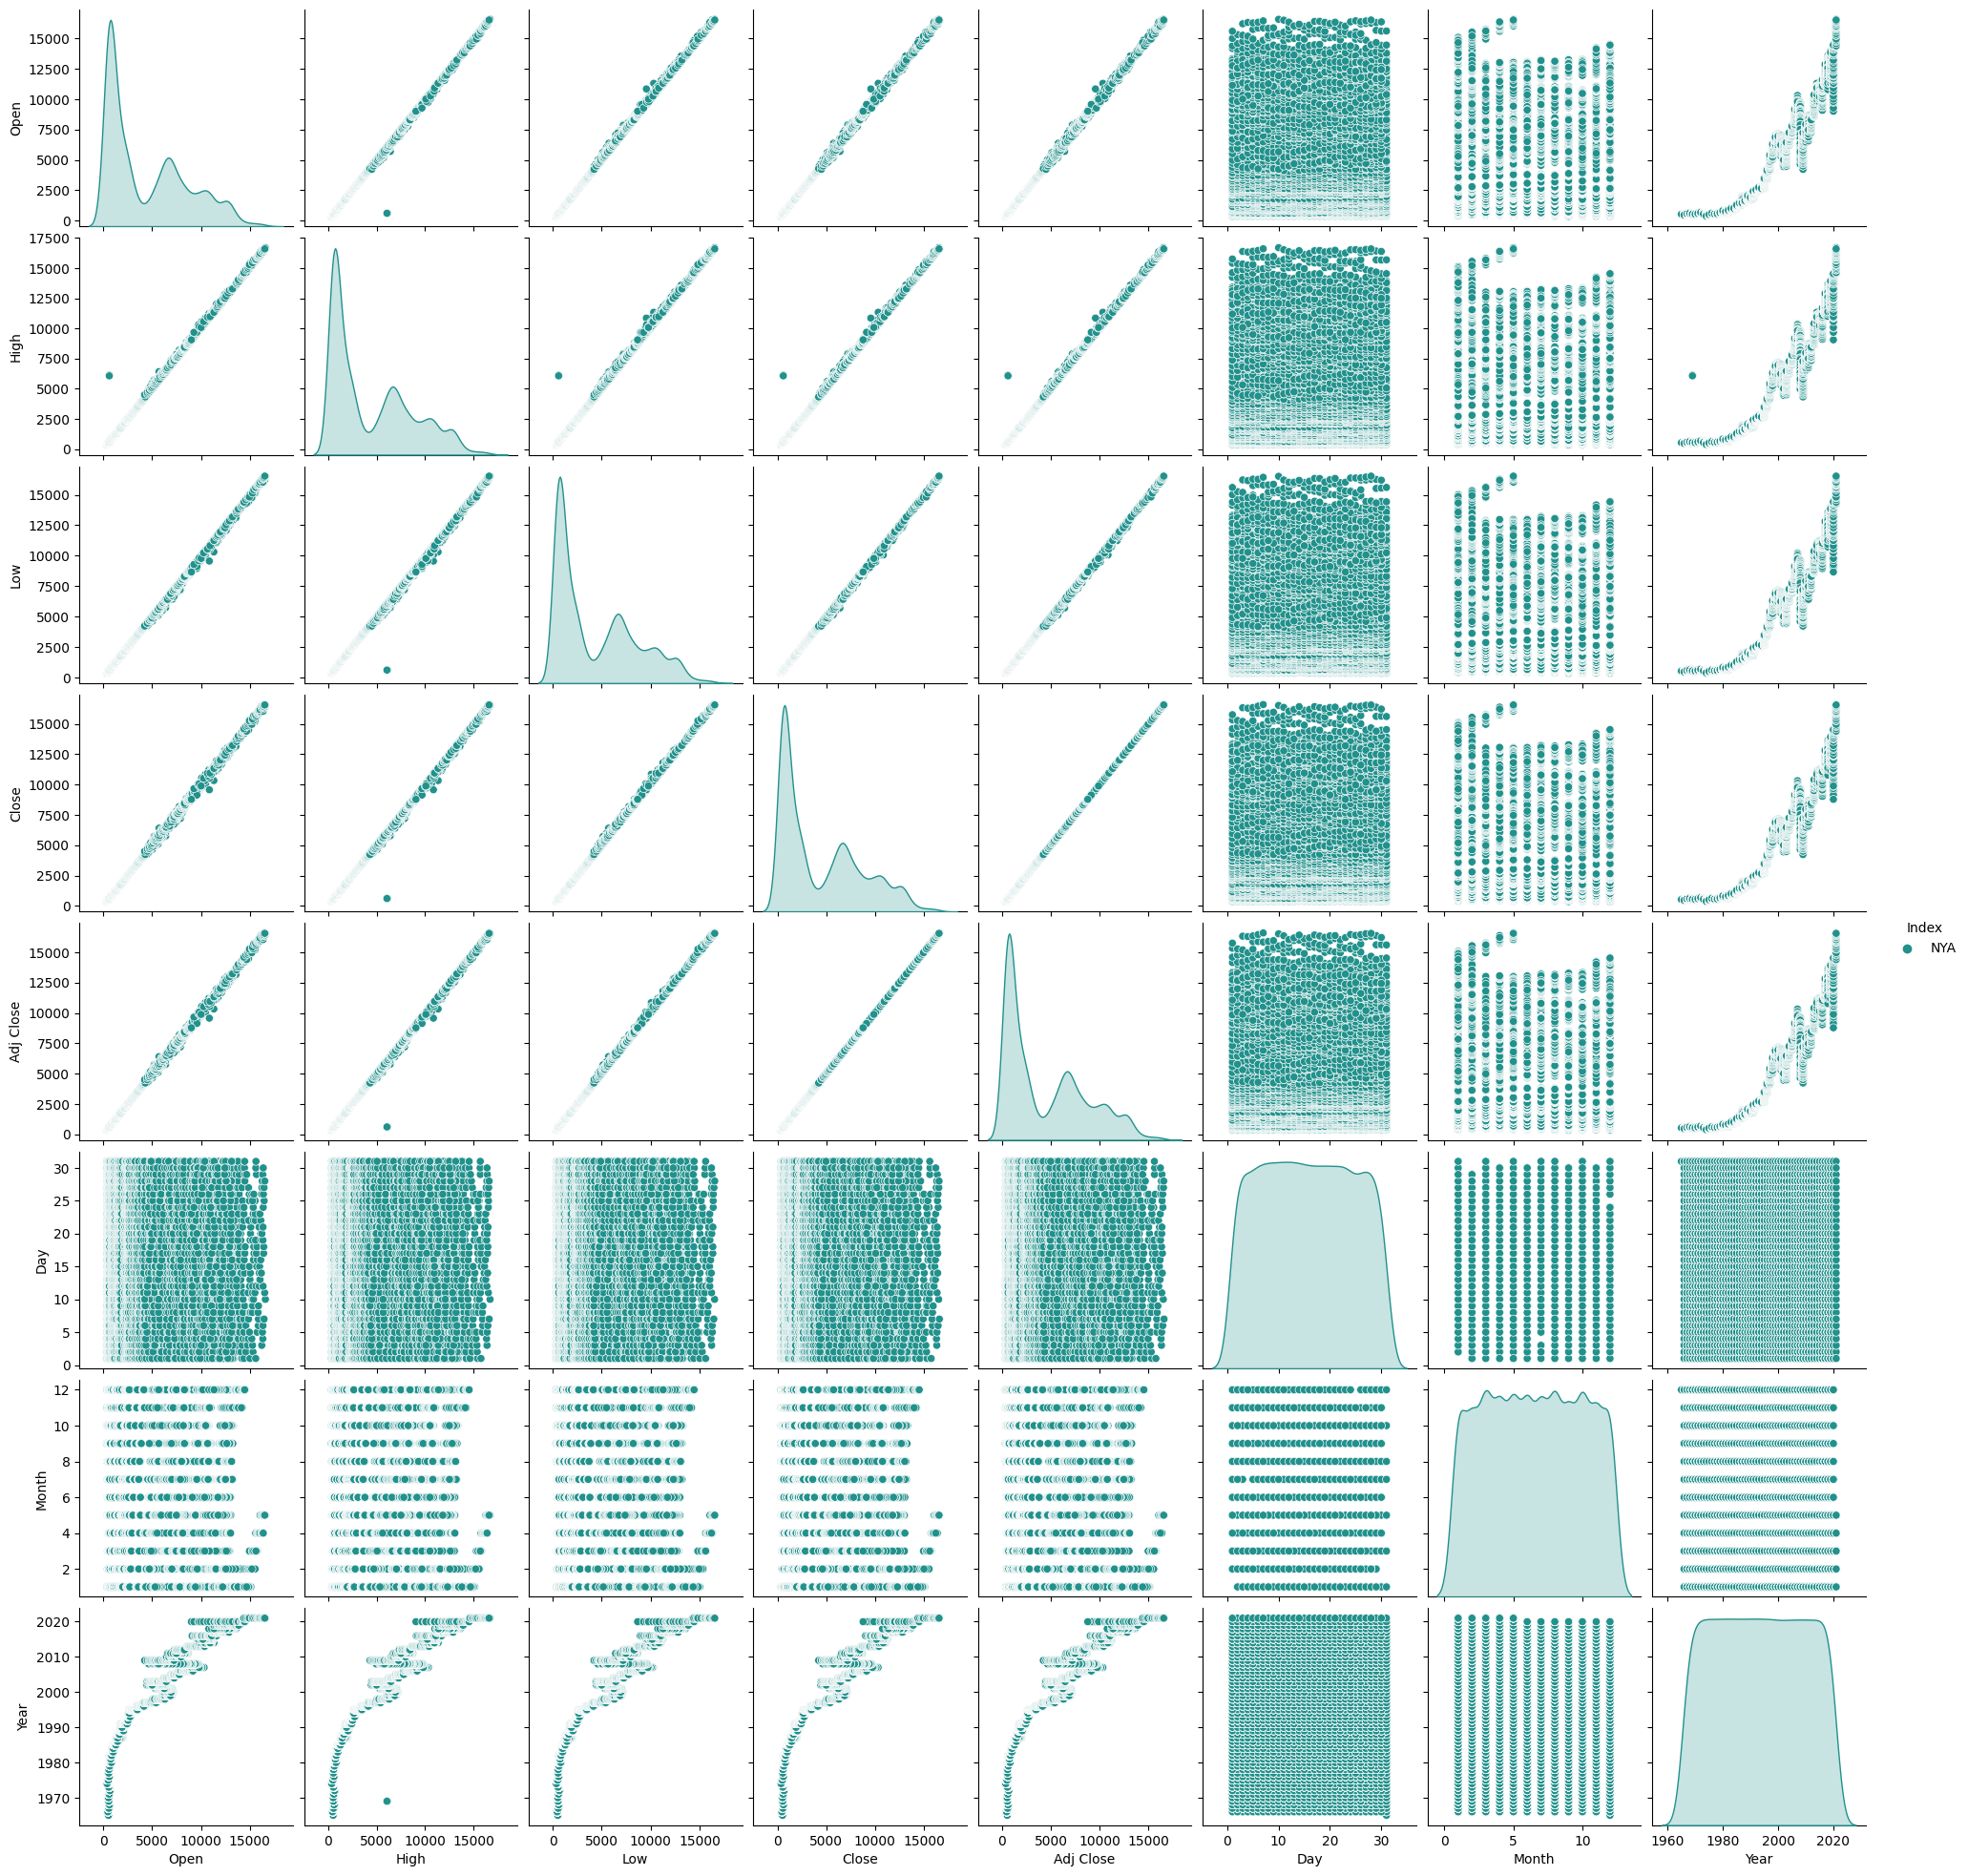

In [50]:
warnings.filterwarnings("ignore")
sns.pairplot(df_5, hue = 'Index', palette= 'viridis')
plt.show()

In [51]:
df_7 = df_6.drop('Index', axis = 1)
z = df_7.corr()
fig = px.imshow(z, text_auto = True, aspect = 'auto', color_continuous_scale = 'YlGnBu')
fig.show()

In [52]:
print(z)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.935441  0.935646  0.935170  0.935425   0.935425   
Open       0.935441  1.000000  0.999963  0.999937  0.999912   0.999912   
High       0.935646  0.999963  1.000000  0.999912  0.999949   0.999949   
Low        0.935170  0.999937  0.999912  1.000000  0.999957   0.999957   
Close      0.935425  0.999912  0.999949  0.999957  1.000000   1.000000   
Adj Close  0.935425  0.999912  0.999949  0.999957  1.000000   1.000000   
Day        0.002179  0.001211  0.001121  0.001401  0.001157   0.001157   
Month      0.008990 -0.003225 -0.003267 -0.003052 -0.003231  -0.003231   
Year       0.999838  0.935500  0.935707  0.935226  0.935485   0.935485   

                Day     Month      Year  
Date       0.002179  0.008990  0.999838  
Open       0.001211 -0.003225  0.935500  
High       0.001121 -0.003267  0.935707  
Low        0.001401 -0.003052  0.935226  
Close      0.001157 -0.003231  0.935485  
Adj Clo

In [53]:
# adding feature of simple moving average
df_6['SMA100'] = df_6['Adj Close'].rolling(100).mean()
df_6['SMA200'] = df_6['Adj Close'].rolling(200).mean()

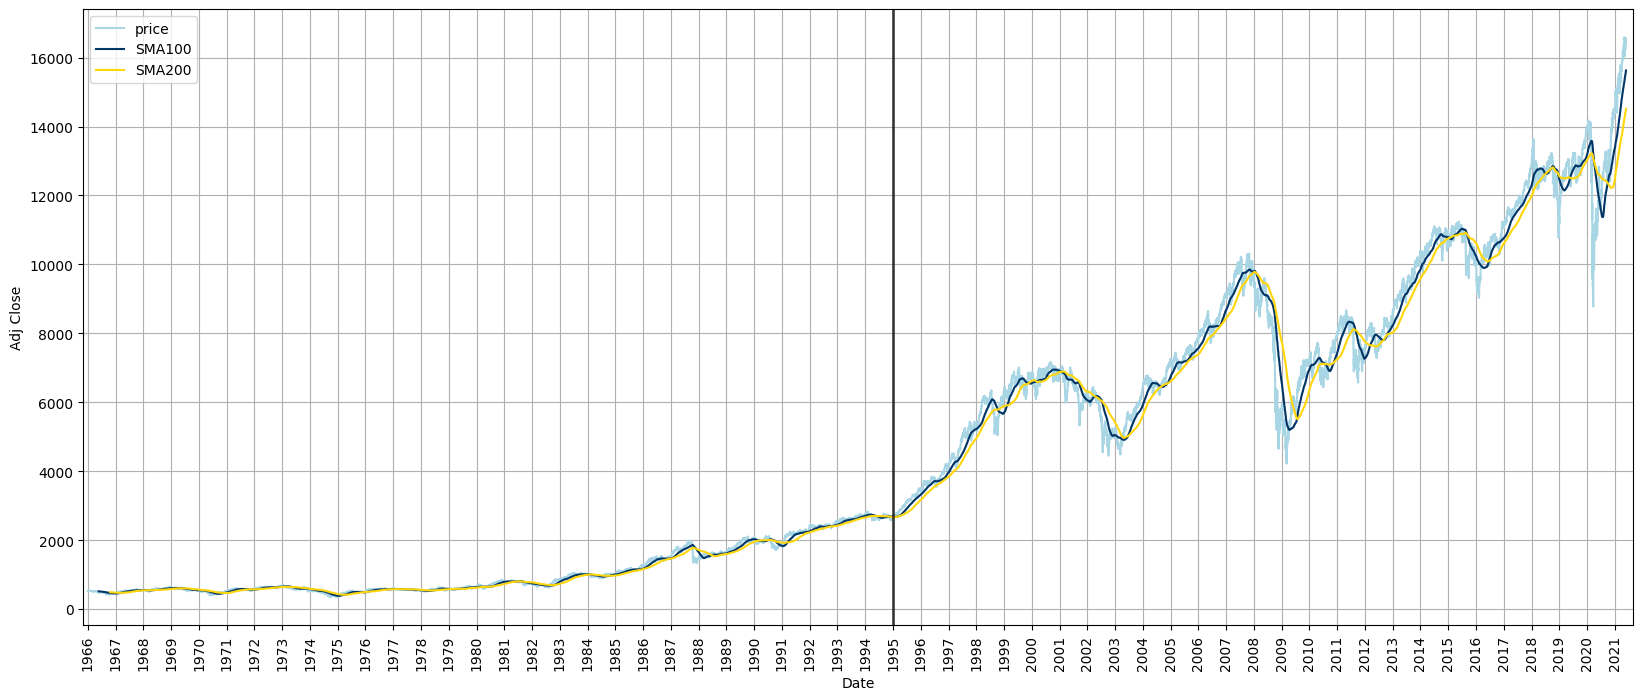

In [54]:
formatt = mdates.DateFormatter('%Y')
locate = mdates.YearLocator(1, month = 1, day = 1)
fig = plt.figure(figsize = (20, 8))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatt)
ax.xaxis.set_major_locator(locate)

plt.plot(df_6['Date'], df_6['Adj Close'], color = '#a9d6e5')
plt.plot(df_6['Date'], df_6['SMA100'], color = '#003566')
plt.plot(df_6['Date'], df_6['SMA200'], color = '#ffd60a')
plt.legend(['price', 'SMA100', 'SMA200'])
ax.tick_params('x', rotation = 90)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xlim(left = mdates.date2num(dt.datetime(1965, 11, 1)),
        right = mdates.date2num(dt.datetime(2021, 9, 1))
        )
plt.grid()
plt.axvline(mdates.date2num(dt.datetime(1995, 1, 1)),
           color = '#000000', lw = 2, alpha = 0.7
           )
plt.show()

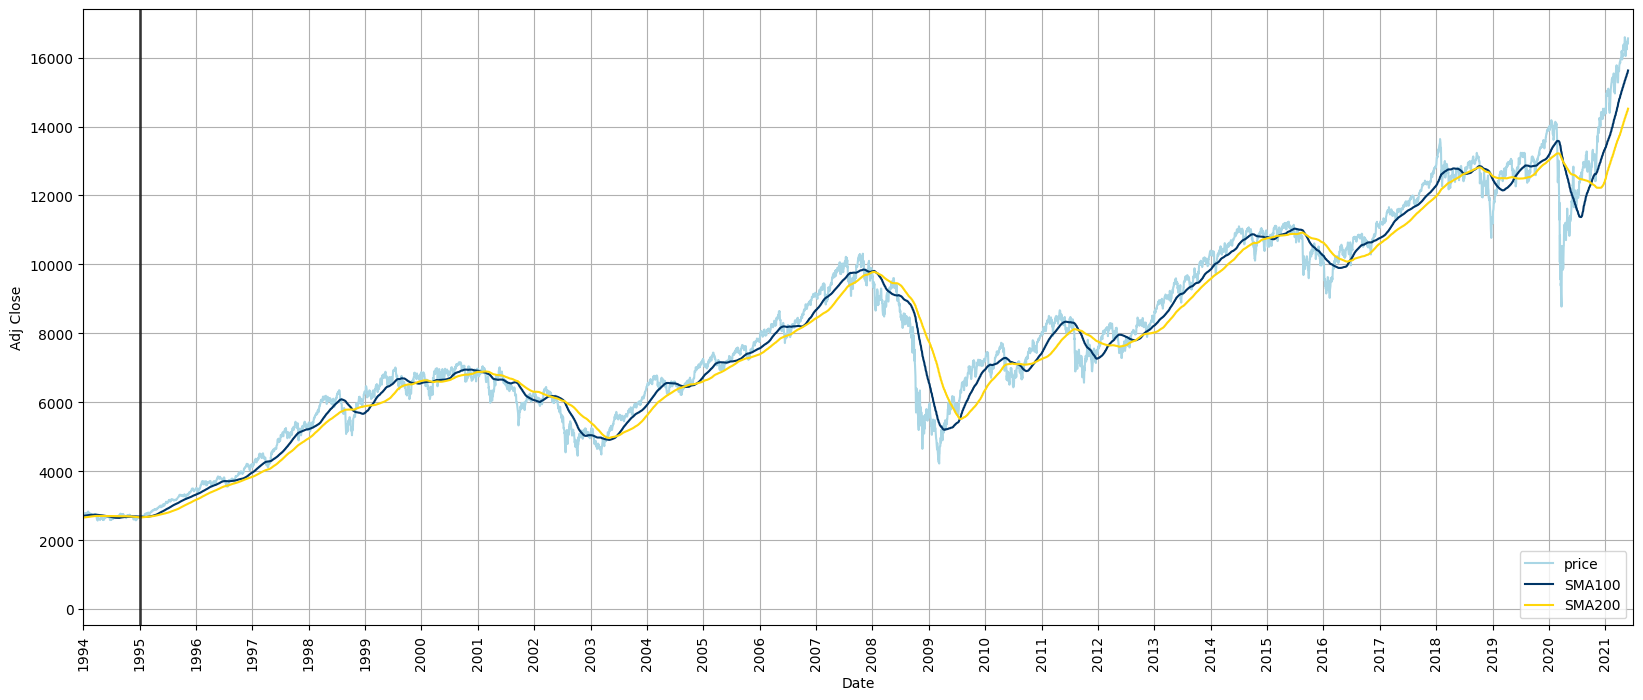

In [55]:
formatt = mdates.DateFormatter('%Y')
locate = mdates.YearLocator(1, month = 1, day = 1)
fig = plt.figure(figsize = (20, 8))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatt)
ax.xaxis.set_major_locator(locate)

plt.plot(df_6['Date'], df_6['Adj Close'], color = '#a9d6e5')
plt.plot(df_6['Date'], df_6['SMA100'], color = '#003566')
plt.plot(df_6['Date'], df_6['SMA200'], color = '#ffd60a')
plt.legend(['price', 'SMA100', 'SMA200'])
ax.tick_params('x', rotation = 90)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xlim(left = mdates.date2num(dt.datetime(1994, 1, 1)),
        right = mdates.date2num(dt.datetime(2021, 7, 1))
        )
plt.grid()
plt.axvline(mdates.date2num(dt.datetime(1995, 1, 1)),
           color = '#000000', lw = 2, alpha = 0.7
           )
plt.show()

# Reference

- https://www.kaggle.com/code/melissamonfared/stock-market-analysis-eda